<a href="https://colab.research.google.com/github/jlazo3010/An-lisis_datos/blob/main/Expectativa_de_vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machinelearning/lifeExpectancy_world.csv')

In [ ]:
df.head()

,Entity,Code,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,27.638,27.878,28.361,28.852,29.350,29.854,30.365,30.882,31.403,31.925,32.446,32.962,33.471,33.971,34.463,34.948,35.430,35.914,36.403,36.900,37.409,37.930,38.461,39.003,39.558,40.128,40.715,41.320,41.944,42.585,43.244,43.923,44.617,45.324,46.040,46.761,47.486,48.211,48.930,49.640,50.331,50.999,51.641,52.256,52.842,53.398,53.924,54.424,54.906,55.376,55.841,56.308,56.784,57.271,57.772,58.290,58.826,59.375,59.930,60.484,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,64.833
1,Africa,NaN,36.450,36.712,37.234,37.754,38.270,38.783,39.293,39.799,40.299,40.793,41.277,41.750,42.211,42.657,43.091,43.513,43.927,44.335,44.742,45.150,45.563,45.984,46.414,46.850,47.290,47.733,48.175,48.612,49.040,49.452,49.851,50.235,50.606,50.959,51.286,51.571,51.798,51.959,52.054,52.092,52.083,52.047,52.005,51.978,51.982,52.022,52.095,52.195,52.323,52.487,52.705,52.995,53.368,53.827,54.367,54.982,55.661,56.382,57.121,57.858,58.576,59.263,59.914,60.527,61.093,61.607,62.064,62.472,62.839,63.170
2,Albania,ALB,54.191,54.399,54.875,55.468,56.180,57.007,57.941,58.969,60.065,61.186,62.283,63.301,64.190,64.914,65.463,65.850,66.110,66.304,66.487,66.689,66.935,67.237,67.582,67.953,68.343,68.736,69.110,69.448,69.742,69.991,70.208,70.416,70.635,70.876,71.134,71.388,71.605,71.760,71.843,71.860,71.836,71.803,71.802,71.860,71.992,72.205,72.495,72.838,73.208,73.587,73.955,74.288,74.579,74.828,75.039,75.228,75.423,75.646,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458,78.573
3,Algeria,DZA,42.087,42.282,42.677,43.081,43.494,43.916,44.347,44.786,45.232,45.684,46.141,46.599,47.056,47.509,47.958,48.394,48.811,49.210,49.597,49.982,50.372,50.773,51.201,51.676,52.218,52.866,53.661,54.609,55.700,56.909,58.198,59.519,60.813,62.029,63.130,64.087,64.884,65.545,66.097,66.554,66.938,67.270,67.575,67.877,68.194,68.540,68.919,69.323,69.745,70.183,70.640,71.116,71.605,72.101,72.594,73.072,73.521,73.936,74.311,74.644,74.938,75.199,75.436,75.661,75.878,76.090,76.298,76.499,76.693,76.880
4,American Samoa,ASM,63.775,63.901,64.159,64.425,64.701,64.985,65.270,65.550,65.813,66.033,66.187,66.251,66.213,66.079,65.876,65.671,65.544,65.557,65.742,66.100,66.601,67.185,67.772,68.299,68.735,69.071,69.319,69.517,69.697,69.867,70.033,70.194,70.344,70.479,70.597,70.700,70.786,70.856,70.912,70.958,70.996,71.030,71.063,71.097,71.132,71.163,71.183,71.190,71.186,71.179,71.184,71.222,71.305,71.439,71.624,71.853,72.116,72.392,72.661,72.911,73.126,73.295,73.419,73.506,73.559,73.588,73.609,73.636,73.679,73.745


In [ ]:
df.describe()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,50.207757,50.526239,51.152881,51.758103,52.341897,52.904280,53.445519,53.965959,54.466399,54.948107,55.412605,55.861934,56.298342,56.724288,57.141872,57.552609,57.957160,58.355132,58.746848,59.133246,59.514819,59.891695,60.264070,60.632560,60.998358,61.363634,61.730802,62.100465,62.472247,62.844893,63.217420,63.588790,63.955539,64.313243,64.657391,64.981029,65.277222,65.543831,65.781584,65.992918,66.182189,66.355498,66.521597,66.688971,66.863798,67.050564,67.251099,67.463901,67.688132,67.925284,68.176934,68.444473,68.727296,69.023951,69.333239,69.654947,69.989132,70.333309,70.683617,71.035481,71.383621,71.723305,72.050909,72.363292,72.657481,72.930885,73.182383,73.414519,73.630617,73.832988
std,11.760972,11.756748,11.759003,11.767933,11.778052,11.784992,11.785442,11.777042,11.758337,11.728160,11.685370,11.629356,11.559763,11.477575,11.384900,11.284284,11.177996,11.069310,10.961536,10.857810,10.762852,10.681950,10.618421,10.575003,10.552434,10.541606,10.522528,10.475093,10.386657,10.257616,10.100381,9.934288,9.779814,9.647805,9.539697,9.457120,9.402978,9.379238,9.388650,9.433502,9.507830,9.595194,9.675688,9.733602,9.764102,9.774405,9.778944,9.791200,9.814071,9.840518,9.859823,9.860755,9.836013,9.781278,9.694314,9.573610,9.419703,9.239829,9.043076,8.837452,8.630897,8.429475,8.237117,8.057339,7.893805,7.749960,7.627608,7.524863,7.439119,7.368626
min,26.408000,26.563000,26.856000,27.117000,27.344000,27.540000,27.705000,27.844000,27.964000,28.077000,28.199000,28.345000,28.535000,28.782000,29.097000,29.489000,29.959000,30.496000,31.086000,31.720000,32.388000,33.078000,33.782000,32.667000,28.040000,23.595000,20.317000,18.907000,19.725000,22.744000,27.536000,33.342000,38.175000,39.671000,40.005000,40.377000,40.147000,39.827000,39.439000,38.439000,33.413000,29.248000,26.691000,26.172000,27.738000,31.037000,35.380000,37.496000,37.980000,38.634000,39.441000,40.369000,41.376000,42.419000,42.731000,42.518000,42.595000,42.854000,43.384000,44.146000,45.100000,46.207000,47.416000,48.663000,49.891000,50.881000,51.593000,52.240000,52.805000,53.283000
25%,40.230500,40.425500,40.793000,41.552500,42.600500,43.122500,43.662000,44.197500,44.782000,45.264000,45.782000,46.308500,46.992000,47.541000,48.309000,49.227500,49.882500,50.526000,51.086500,51.685000,52.190000,52.531000,53.059500,53.573000,54.046500,54.736000,55.443000,55.811500,56.150000,56.667500,56.898000,57.260000,57.574000,58.066500,58.677000,59.136500,59.407500,59.611500,60.068000,60.009500,60.184000,60.439500,60.675000,60.587500,60.727000,60.818500,60.689000,61.132500,61.601500,61.961500,62.478500,62.999500,63.605000,64.069000,64.554000,65.055500,65.446000,65.877500,66.300500,66.677500,66.939500,67.303500,67.632500,67.942000,68.279500,68.622000,68.937000,69.227000,69.493000,69.739500
50%,51.660000,52.089000,52.940000,53.764000,54.571000,55.246000,55.690000,56.008000,56.512000,5

In [ ]:
Na = []
for i in range(1950,2019):
  x = pd.isnull(df[str(i)]).values.ravel().sum()
  Na.append(x)
print('Hay un total de ' + repr(pd.array(Na).sum())  + ' valores Na en este dataset') 

Hay un total de 0 valores Na en este dataset


Text(0, 0.5, 'Edad')

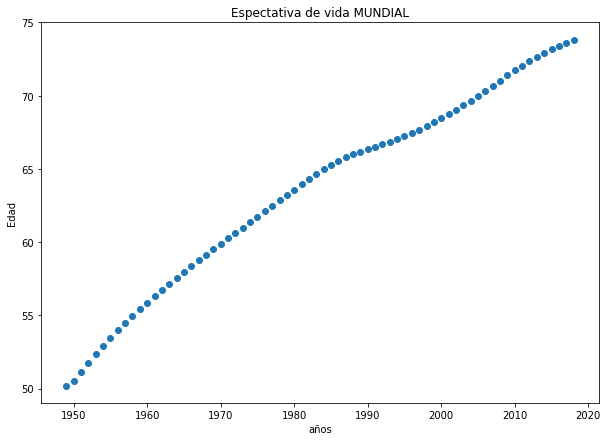

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x = range(1949,2019), y = df.mean())
plt.title('Espectativa de vida MUNDIAL')
plt.xlabel('años')
plt.ylabel('Edad')

In [ ]:
regresion_lineal = LinearRegression()

In [ ]:
x = np.arange(1949,2019).reshape(-1,1)
y = df.mean()
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
regresion_lineal.fit(X_train, y_train)
Y_predict = regresion_lineal.predict(X_test)

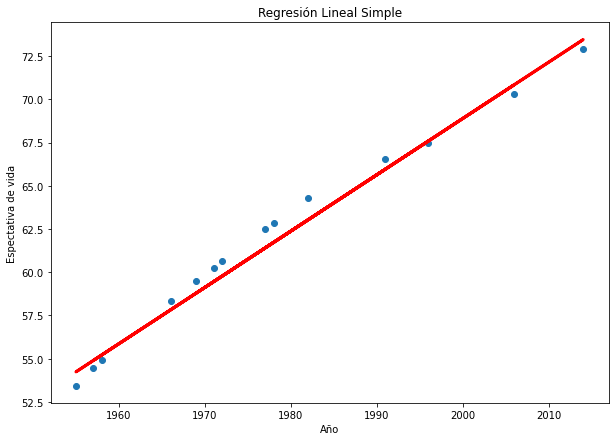

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_predict, color='red', linewidth =3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Año')
plt.ylabel('Espectativa de vida')
plt.show()

In [ ]:
print('Los coeficientes son' +' '+ 'a = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_) + 
      ' y tiene una presición de' + ' '+ str(regresion_lineal.score(X_train, y_train)))

Los coeficientes son a = [0.32574989], b = -582.6070943304953 y tiene una presición de 0.9832990594444507


[75.73343659 76.05918648 76.38493638]


Text(0.5, 1.0, 'Espectativa de vida en los siguientes años MUNDIALMENTE')

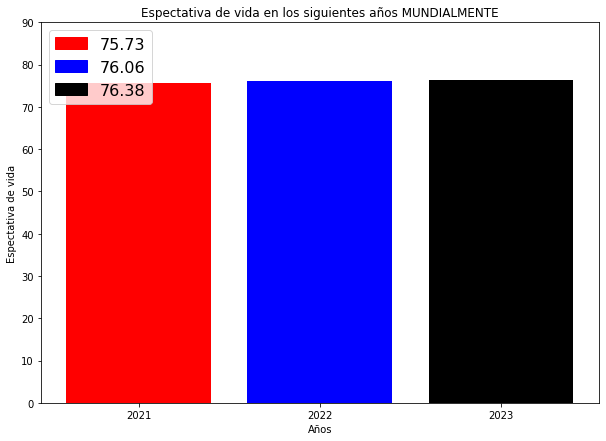

In [ ]:
X = np.arange(2021,2024).reshape(-1,1)
prediccion = regresion_lineal.predict(X)
print(prediccion)
año21 = mpatches.Patch(color='red', label= round(prediccion[0],2))
año22 = mpatches.Patch(color='blue', label= round(prediccion[1],2))
año23 = mpatches.Patch(color='black', label= round(prediccion[2],2))
plt.figure(figsize=(10,7))
plt.bar([2021,2022,2023],prediccion, color = ['r','b','black'])
plt.xticks([2021,2022,2023])
plt.xlabel('Años')
plt.ylabel('Espectativa de vida')
plt.ylim(0,90)
plt.legend(handles=[año21,año22,año23], loc='upper left', fontsize=16)
plt.title('Espectativa de vida en los siguientes años MUNDIALMENTE')

In [ ]:
mexico = df[df['Entity'] == 'Mexico']

In [ ]:
mexico[mexico == mexico.values[:,2:].max()].dropna(axis=1, how='any') #Año donde esta la mayor espectativa de vida

,2005
137,75.3


Text(0, 0.5, 'Edades')

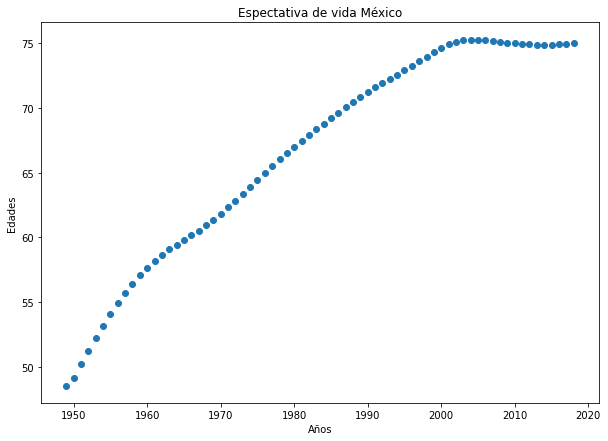

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x = range(1949,2019), y = mexico.mean())
plt.title('Espectativa de vida México')
plt.xlabel('Años')
plt.ylabel('Edades')

In [ ]:
x_p = np.arange(1949,2019).reshape(-1,1)
y_p = mexico.mean()
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size=0.2)

In [ ]:

poli_reg = PolynomialFeatures(degree = 2)

In [ ]:
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

In [ ]:
pr = LinearRegression()
pr.fit(X_train_poli, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred_pr = pr.predict(X_test_poli)

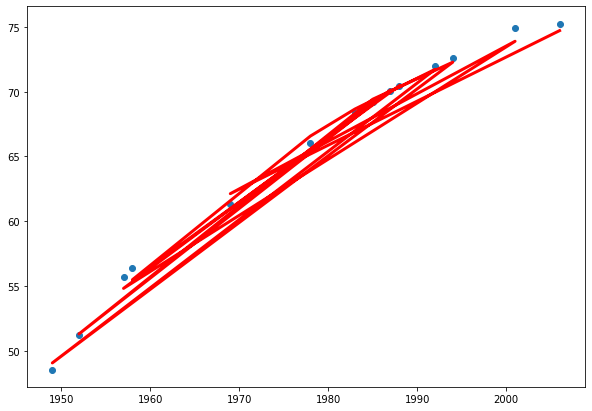

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test_p, y_test_p)
plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)

In [ ]:
print('Valor de la pendiente o coeficiente "a":')
print(pr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(pr.intercept_)

Valor de la pendiente o coeficiente "a":
[ 0.00000000e+00  2.21799379e+01 -5.49427462e-03]
Valor de la intersección o coeficiente "b":
-22309.085173307292


In [ ]:
print('Precisión del modelo:')
print(pr.score(X_train_poli, y_train_p))

Precisión del modelo:
0.9943751445420949


In [ ]:
X_p = np.arange(2021,2024).reshape(-1,1)
X_p_transformado = poli_reg.fit_transform(X_p)
prediccionmexico = pr.predict(X_p_transformado)
prediccionmexico

array([75.52879003, 75.49537564, 75.4509727 ])

Text(0, 0.5, 'Edad')

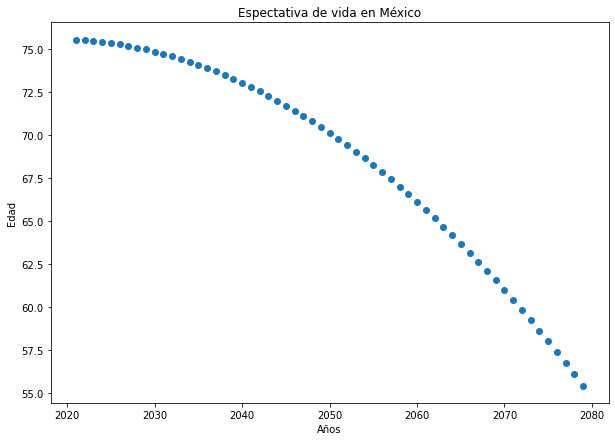

In [ ]:
X_p_mucho = np.arange(2021,2080).reshape(-1,1)
X_p_transformado_mucho = poli_reg.fit_transform(X_p_mucho)
prediccionmexicomucho = pr.predict(X_p_transformado_mucho)
plt.figure(figsize=(10,7))
plt.scatter(X_p_mucho,prediccionmexicomucho)
plt.title('Espectativa de vida en México')
plt.xlabel('Años')
plt.ylabel('Edad')

Text(0.5, 1.0, 'Espectativa de vida en los siguientes años en México')

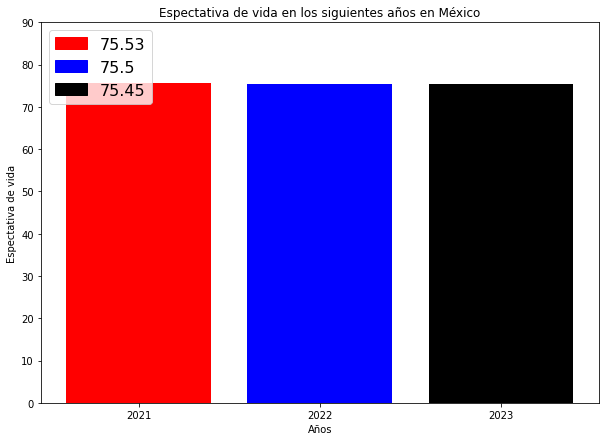

In [ ]:
año21 = mpatches.Patch(color='red', label= round(prediccionmexico[0],2))
año22 = mpatches.Patch(color='blue', label= round(prediccionmexico[1],2))
año23 = mpatches.Patch(color='black', label= round(prediccionmexico[2],2))
plt.figure(figsize=(10,7))
plt.bar([2021,2022,2023],prediccionmexico, color = ['r','b','black'])
plt.xticks([2021,2022,2023])
plt.xlabel('Años')
plt.ylabel('Espectativa de vida')
plt.ylim(0,90)
plt.legend(handles=[año21,año22,año23], loc='upper left', fontsize=16)
plt.title('Espectativa de vida en los siguientes años en México')

In [ ]:
USA = df[df['Entity'] == 'United States']

Text(0, 0.5, 'Edad')

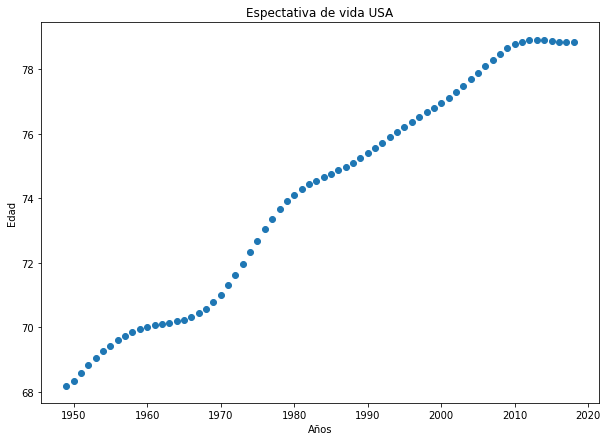

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x = range(1949,2019), y = USA.mean())
plt.title('Espectativa de vida USA')
plt.xlabel('Años')
plt.ylabel('Edad')

In [ ]:
regresion_lineal_usa = LinearRegression()

In [ ]:
x_usa = np.arange(1949,2019).reshape(-1,1)
y_usa = USA.mean()
X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(x_usa,y_usa, test_size=0.2)

In [ ]:
regresion_lineal_usa.fit(X_train_usa, y_train_usa)
Y_predict = regresion_lineal_usa.predict(X_test_usa)

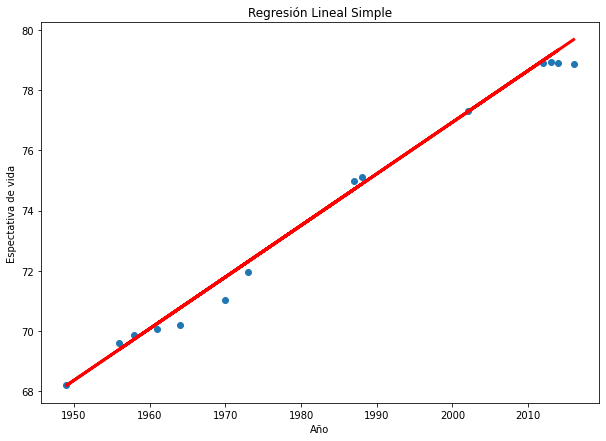

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_test_usa, y_test_usa)
plt.plot(X_test_usa, Y_predict, color='red', linewidth =3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Año')
plt.ylabel('Espectativa de vida')
plt.show()

In [ ]:
print('Los coeficientes son' +' '+ 'a = ' + str(regresion_lineal_usa.coef_) + ', b = ' + str(regresion_lineal_usa.intercept_) + 
      ' y tiene una presición de' + ' '+ str(regresion_lineal_usa.score(X_train, y_train)))

Los coeficientes son a = [0.17160937], b = -266.28207381892145 y tiene una presición de -1.586139516293191


[80.54046469 80.71207406 80.88368343]


Text(0.5, 1.0, 'Espectativa de vida en los siguientes años en USA')

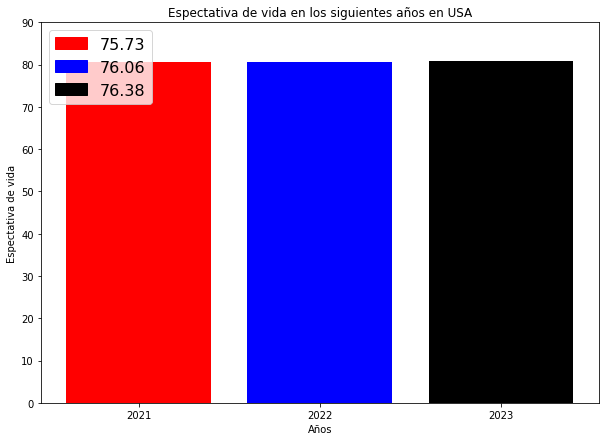

In [ ]:
X = np.arange(2021,2024).reshape(-1,1)
prediccion_usa = regresion_lineal_usa.predict(X)
print(prediccion_usa)
año21 = mpatches.Patch(color='red', label= round(prediccion[0],2))
año22 = mpatches.Patch(color='blue', label= round(prediccion[1],2))
año23 = mpatches.Patch(color='black', label= round(prediccion[2],2))
plt.figure(figsize=(10,7))
plt.bar([2021,2022,2023],prediccion_usa, color = ['r','b','black'])
plt.xticks([2021,2022,2023])
plt.xlabel('Años')
plt.ylabel('Espectativa de vida')
plt.ylim(0,90)
plt.legend(handles=[año21,año22,año23], loc='upper left', fontsize=16)
plt.title('Espectativa de vida en los siguientes años en USA')

In [ ]:
print('Precisión del modelo:')
print(regresion_lineal_usa.score(X_train_usa, y_train_usa))

Precisión del modelo:
0.9836168369444409
